# **Data Description**
- The "installments_payments.csv" represents **repayment history for the previously disbursed credits** in Home Credit related to the loans in the sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

# **Import all needed packages and modules**

In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

# **A First Sight to Our Dataset**

**Column Description**

In [2]:
col_description = pd.read_csv('../input/home-credit-default-risk/HomeCredit_columns_description.csv', encoding='latin')
pd.set_option('display.max_info_rows', None)
pd.set_option('display.max_colwidth', None)
# col_description[col_description['Table'] == 'installments_payments.csv'][['Row', 'Description']]

**The First Five Rows**

In [14]:
installments_payments = pd.read_csv('../input/home-credit-default-risk/installments_payments.csv')
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [15]:
# SIZE OF THE DATA
print('\nSize of installments_payments data:', installments_payments.shape)


Size of installments_payments data: (13605401, 8)


In [16]:
# DATATYPE OF EACH COLUMN
installments_payments.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [18]:
# NUMBER OF NULL VALUES IN EACH COLUMN
installments_payments.isna().sum().sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        2905
AMT_PAYMENT               2905
SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
AMT_INSTALMENT               0
dtype: int64

In [19]:
# PERCENTAGE OF NULL VALUES IN EACH COLUMN
(installments_payments.isna().sum() / installments_payments.shape[0]).sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        0.000214
AMT_PAYMENT               0.000214
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64

*Two columns: the day and the amount customers actually paid (DAYS_ENTRY_PAYMENT and AMT_PAYMENT) include the same amount of null values*

***0.02% of clients haven't paid previous credit on this installment***

# **SUMMARIZATION**

In [20]:
installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


*That the average **AMT_INSTALLMENTS** (the prescribed installment amount on this installment is) **smaller** than **AMT_PAYMENTS** (the amount client actually paid on this installment) suggests:*

***Some loans are not repayed on time***

# **Histogram**

array([[<AxesSubplot:title={'center':'DAYS_INSTALMENT'}>,
        <AxesSubplot:title={'center':'DAYS_ENTRY_PAYMENT'}>]],
      dtype=object)

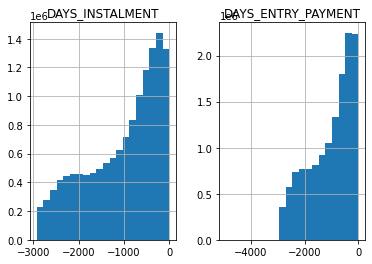

In [9]:
installments_payments.iloc[:,4:6].hist(bins=20)

***The histogram of prescribed installment day and actually paid day also suggests late payment of the customer***

In [10]:
# x, y = np.unique(installments_payments['SK_ID_CURR'], return_counts = True)
# dict(zip(x, y))
# installments_payments.columns
# # new feature : Days past due (time difference between prescribed installment day and actually paid day)
# installments_payments2 = installments_payments.copy()
# installments_payments2['Delay'] = installments_payments2['DAYS_ENTRY_PAYMENT'] - installments_payments2['DAYS_INSTALMENT']
# installments_payments2.groupby('SK_ID_CURR')['Delay'].sum().sort_values()
# # remove customer pay early
# installments_payments2 = installments_payments2[installments_payments2['Delay'] > 0]
# installments_payments2['Delay']
# installments_payments[installments_payments['SK_ID_CURR'] == 134734]

# **PAIRPLOT**

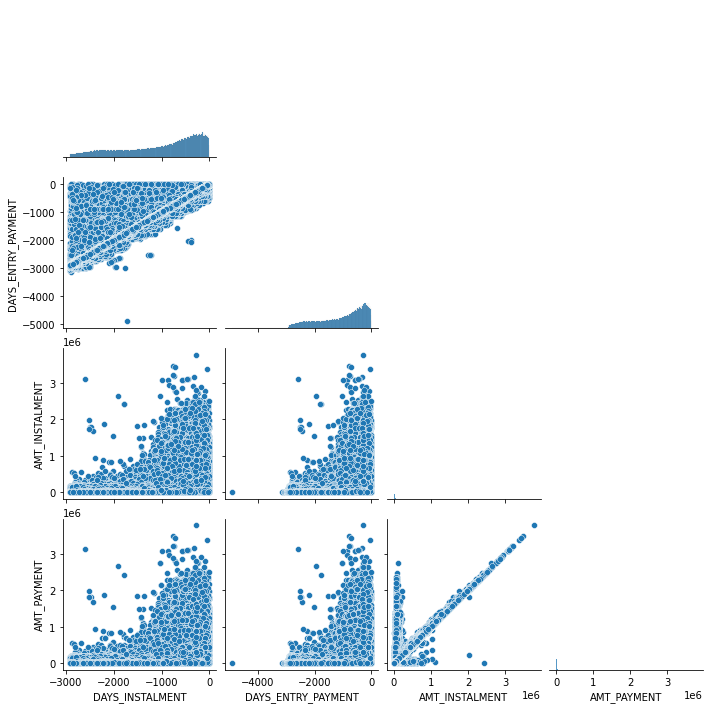

In [11]:
sns.pairplot(installments_payments.iloc[:,4:8], corner=True)

# **CORRELATION**

In [12]:
installments_payments.corr()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,1.000000,0.002132,0.000685,-0.002095,0.003748,0.003734,0.002042,0.001887
SK_ID_CURR,0.002132,1.000000,0.000480,-0.000548,0.001191,0.001215,-0.000226,-0.000124
NUM_INSTALMENT_VERSION,0.000685,0.000480,1.000000,-0.323414,0.130244,0.128124,0.168109,0.177176
NUM_INSTALMENT_NUMBER,-0.002095,-0.000548,-0.323414,1.000000,0.090286,0.094305,-0.089640,-0.087664
DAYS_INSTALMENT,0.003748,0.001191,0.130244,0.090286,1.000000,0.999491,0.125985,0.127018
DAYS_ENTRY_PAYMENT,0.003734,0.001215,0.128124,0.094305,0.999491,1.000000,0.125555,0.126602
AMT_INSTALMENT,0.002042,-0.000226,0.168109,-0.089640,0.125985,0.125555,1.000000,0.937191
AMT_PAYMENT,0.001887,-0.000124,0.177176,-0.087664,0.127018,0.126602,0.937191,1.000000


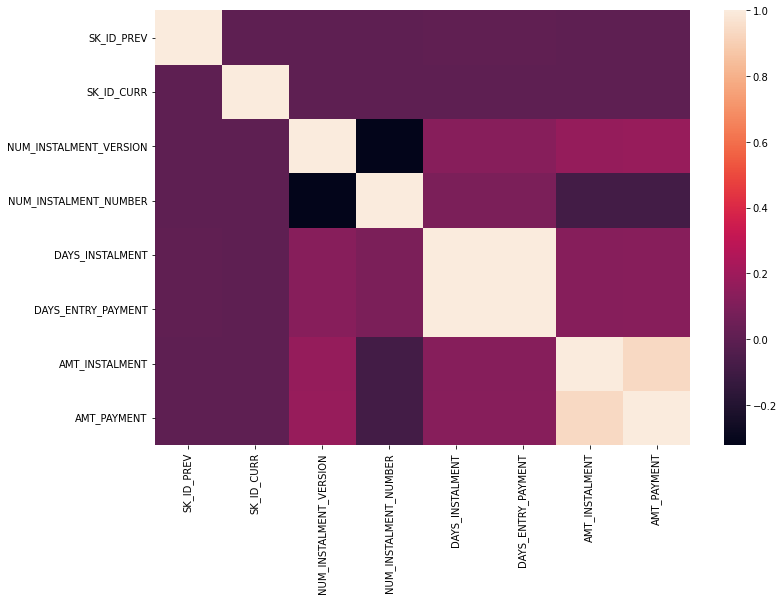

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(installments_payments.corr())

plt.show()

# **EDA COMPLETED => CLEANING**

In [ ]:
# không bỏ cột nào

# SK_ID_PREV, SK_ID_CURR, NUM_INSTALMENT_VERSION và
# NUM_INSTALMENT_NUMBER tạo thành composite key

# AMT_PAYMENT và AMT_INSTALLMENT tuy có high correlation nhưng là biến quan trọng